<a href="https://colab.research.google.com/github/Ananda0047/Bangla-Sentiment-Analysis/blob/main/Bangla_Dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sadness Raw.xlsx to Sadness Raw.xlsx


In [ ]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Sadness Raw.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
data.columns=["Comment"]

In [ ]:
data

,Comment
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...
...,...
822,তার কাছে কষ্টের কথাটি শুনে খুব খারাপ লেগেছে
823,সে এভাবে এসে পরে চলে গেলো তাই সবাই কষ্ট পেয়েছে
824,ছেলেটি অন্য কারো প্রেমে পড়েছে তাই মেয়েটি কষ্ট ...
825,সে কখোনো সমুদ্র দেখে নি তাই তার মন ভীষন রকমের ...


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install wordcloud


In [ ]:
%%capture
!pip install langdetect

In [ ]:
from langdetect import detect

In [ ]:
data.shape

(827, 1)

In [ ]:
def f1(x):
    try:
        return detect(x)
    except:
        return np.nan

data['lang'] = data.Comment.apply(f1)

df1 = data[data.Comment.isna()]
df1.head()
#df_new = data[data.new.eq('en')]

,Comment,lang


In [ ]:
df1.head()

,Comment,lang


In [ ]:
data[data["lang"]=="bn"]

,Comment,lang
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা,bn
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...,bn
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়,bn
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা,bn
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...,bn
...,...,...
822,তার কাছে কষ্টের কথাটি শুনে খুব খারাপ লেগেছে,bn
823,সে এভাবে এসে পরে চলে গেলো তাই সবাই কষ্ট পেয়েছে,bn
824,ছেলেটি অন্য কারো প্রেমে পড়েছে তাই মেয়েটি কষ্ট ...,bn
825,সে কখোনো সমুদ্র দেখে নি তাই তার মন ভীষন রকমের ...,bn


In [ ]:
data[data["lang"]=="bn"].shape

(827, 2)

In [ ]:
data=data[data["lang"]=="bn"].reset_index().drop(columns=["index","lang"])
data.head(100)

,Comment
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...
...,...
95,কান্না ছাড়া কিছু বলার নাই আমাদের জনগনের
96,লুটপাট ও টাকা পাচারের ফল জনগণ পেতে শুরু করেছে
97,সারা বাংলাদেশে একই হাল
98,আমার ছোট মেয়েটার জন্য আরো সমস্যা খুব কষ্ট হয় তার


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 18.5 MB/s eta 0:00:00


In [ ]:
import re
from re import sub
import multiprocessing
from unidecode import unidecode
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
data['Comment'] = data.Comment.apply(lambda x: preprocessing(str(x)))

In [ ]:
data

,Comment
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...
...,...
822,তার কাছে কষ্টের কথাটি শুনে খুব খারাপ লেগেছে
823,সে এভাবে এসে পরে চলে গেলো তাই সবাই কষ্ট পেয়েছে
824,ছেলেটি অন্য কারো প্রেমে পড়েছে তাই মেয়েটি কষ্ট ...
825,সে কখোনো সমুদ্র দেখে নি তাই তার মন ভীষন রকমের ...


In [ ]:
data["Count"]=data['Comment'].str.count(' ') + 1
data.head()

,Comment,Count
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা,6
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...,15
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়,6
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা,6
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...,9


In [ ]:
data["Count"].describe()

count    827.000000
mean       9.212817
std        3.684360
min        3.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: Count, dtype: float64

In [ ]:
data["Count"].sort_values(ascending=False)

620    21
349    20
6      20
443    19
125    19
       ..
765     3
808     3
26      3
159     3
773     3
Name: Count, Length: 827, dtype: int64

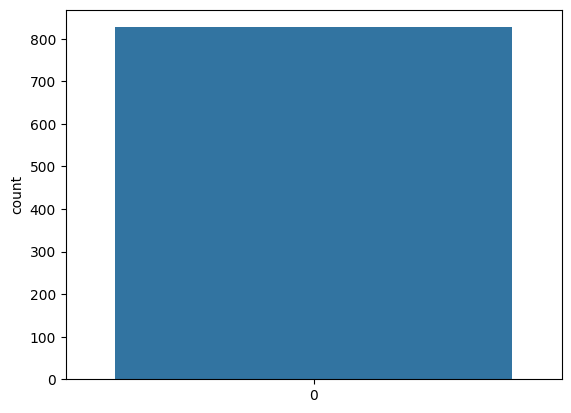

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['Count']);

In [ ]:
data1=data[(data["Count"]>2) & (data["Count"]<23)]

In [ ]:
data1.shape

(827, 2)

In [ ]:
data1=data1.reset_index().drop(columns=["index"])

In [ ]:
data1.shape

(827, 2)

In [ ]:
data1[["Comment"]]

,Comment
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...
...,...
822,তার কাছে কষ্টের কথাটি শুনে খুব খারাপ লেগেছে
823,সে এভাবে এসে পরে চলে গেলো তাই সবাই কষ্ট পেয়েছে
824,ছেলেটি অন্য কারো প্রেমে পড়েছে তাই মেয়েটি কষ্ট ...
825,সে কখোনো সমুদ্র দেখে নি তাই তার মন ভীষন রকমের ...


In [ ]:

#Adding new column with a constant value
data1["Sentiment"] = "sadness"
print(data1)


                                               Comment  Count Sentiment
0                 দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা      6   sadness
1    ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...     15   sadness
2                      দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়      6   sadness
3          ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা      6   sadness
4    আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...      9   sadness
..                                                 ...    ...       ...
822        তার কাছে কষ্টের কথাটি শুনে খুব খারাপ লেগেছে      8   sadness
823     সে এভাবে এসে পরে চলে গেলো তাই সবাই কষ্ট পেয়েছে     10   sadness
824  ছেলেটি অন্য কারো প্রেমে পড়েছে তাই মেয়েটি কষ্ট ...      9   sadness
825  সে কখোনো সমুদ্র দেখে নি তাই তার মন ভীষন রকমের ...     11   sadness
826  সে তার কষ্ট গুলো এভাবে মেনে নিয়েছে তাই খারাপ ল...     12   sadness

[827 rows x 3 columns]


In [ ]:
data1

,Comment,Count,Sentiment
0,দুর্নীতি করবেন আপনারা কষ্ট করবো আমরা,6,sadness
1,ভাই আমরা চট্টগ্রামে শহরে অনেক অনেক কষ্টে আছি প...,15,sadness
2,দিনে রাতে বিদ্যুৎ থাকে না ঢাকায়,6,sadness
3,ময়মনসিংহ বিদ্যুতের একই সমস্যা আর ভাল্লাগেনা,6,sadness
4,আমাদের এখানে বেশি লোডশেডিং হচ্ছে কষ্টে আর থাকত...,9,sadness
...,...,...,...
822,তার কাছে কষ্টের কথাটি শুনে খুব খারাপ লেগেছে,8,sadness
823,সে এভাবে এসে পরে চলে গেলো তাই সবাই কষ্ট পেয়েছে,10,sadness
824,ছেলেটি অন্য কারো প্রেমে পড়েছে তাই মেয়েটি কষ্ট ...,9,sadness
825,সে কখোনো সমুদ্র দেখে নি তাই তার মন ভীষন রকমের ...,11,sadness


In [ ]:
data1[["Comment","Sentiment"]].to_excel("Sadness_818.xlsx",index=False)